In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

In [407]:
def read(file_name):
  palavras = []
  with open(file_name, 'r') as file:
    for line in file:
      palavras.append(line.replace('\n',''))
  return palavras

def get_random_tweet():
    return tweets[random.randint(0, len(tweets)-1)]

def includes(list, word):
    for item in list:
        if(item.upper().replace('.', '') == word.upper().replace('.', '')):
            print(item, word)
            return True
    return False

positivas = read('./palavras/positivas.txt')
negativas = read('./palavras/negativas.txt')
tweets = read('./palavras/tweets.txt')

def get_input():
    tweet = get_random_tweet()
    print(tweet)
    palavras = tweet.split(' ')

    quantidade_palavras = len(palavras)
    quantidade_positivas = 0
    quantidade_negativas = 0
    for palavra in palavras:
        if includes(positivas, palavra):
                quantidade_positivas += 1
        if includes(negativas, palavra):
            quantidade_negativas += 1
    return [quantidade_positivas*3, quantidade_negativas*3]

In [396]:
fequencia_positiva = ctrl.Antecedent(np.arange(0, 11, 1), 'fequencia_positiva')
fequencia_negativa = ctrl.Antecedent(np.arange(0, 11, 1), 'fequencia_negativa')

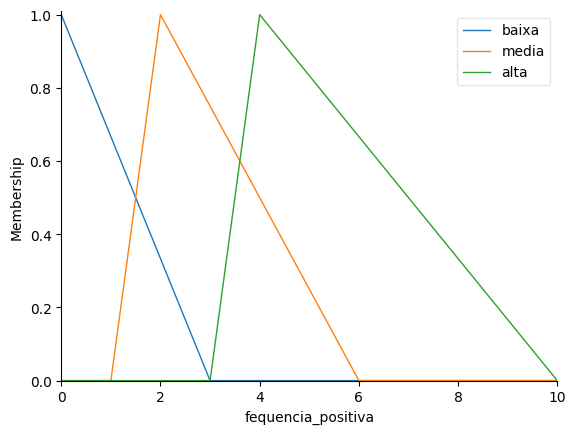

In [397]:
# set definitions
fequencia_positiva['baixa'] = fuzz.trimf(fequencia_positiva.universe, [0, 0, 3])
fequencia_positiva['media'] = fuzz.trimf(fequencia_positiva.universe, [2, 2, 6])
fequencia_positiva['alta'] = fuzz.trimf(fequencia_positiva.universe, [4, 4, 10])

fequencia_positiva.view()

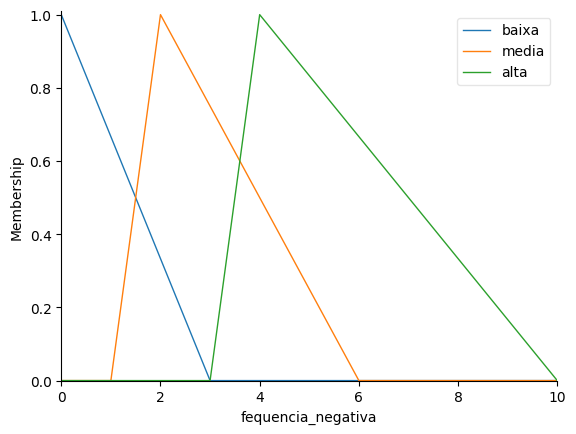

In [398]:

# set definitions
fequencia_negativa['baixa'] = fuzz.trimf(fequencia_negativa.universe, [0, 0, 3])
fequencia_negativa['media'] = fuzz.trimf(fequencia_negativa.universe, [2, 2, 6])
fequencia_negativa['alta'] = fuzz.trimf(fequencia_negativa.universe, [4,4, 10])

fequencia_negativa.view()

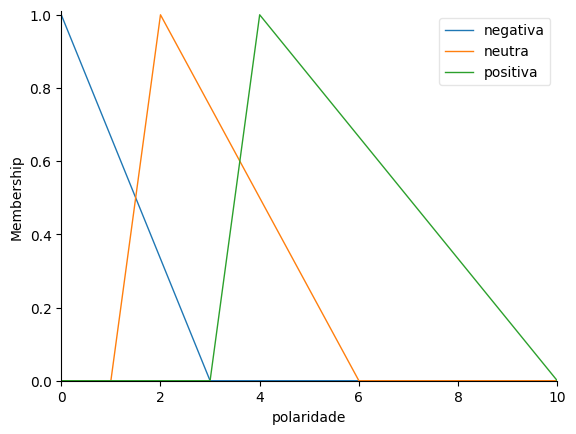

In [399]:
polaridade = ctrl.Consequent(np.arange(0, 11, 1), 'polaridade')
# Custom membership functions can be built interactively with a familiar,
polaridade['negativa'] = fuzz.trimf(polaridade.universe,  [0, 0, 3])
polaridade['neutra'] = fuzz.trimf(polaridade.universe, [2, 2, 6])
polaridade['positiva'] = fuzz.trimf(polaridade.universe, [4, 4, 10])

polaridade.view()

In [423]:
# Rules
rule1 = ctrl.Rule(fequencia_negativa['baixa'] & fequencia_positiva['baixa'], polaridade['neutra'])
rule2 = ctrl.Rule(fequencia_negativa['media'] & fequencia_positiva['media'], polaridade['neutra'])
rule3 = ctrl.Rule(fequencia_negativa['alta'] & fequencia_positiva['alta'], polaridade['neutra'])

rule4 = ctrl.Rule(fequencia_negativa['baixa'] & fequencia_positiva['media'], polaridade['positiva'])
rule4 = ctrl.Rule(fequencia_negativa['baixa'] & fequencia_positiva['alta'], polaridade['positiva'])
rule5 = ctrl.Rule(fequencia_negativa['media'] & fequencia_positiva['alta'], polaridade['positiva'])

rule6 = ctrl.Rule(fequencia_negativa['media'] & fequencia_positiva['baixa'], polaridade['negativa'])
rule7 = ctrl.Rule(fequencia_negativa['alta'] & fequencia_positiva['baixa'], polaridade['negativa'])
rule8 = ctrl.Rule(fequencia_negativa['alta'] & fequencia_positiva['media'], polaridade['negativa'])



In [430]:
polaridade_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
polaridade_ctrl_sys = ctrl.ControlSystemSimulation(polaridade_ctrl)


resultado_positivo, resultado_negativo = get_input()
# execução
polaridade_ctrl_sys.input['fequencia_positiva'] = resultado_positivo
polaridade_ctrl_sys.input['fequencia_negativa'] = resultado_negativo

polaridade_ctrl_sys.compute()
print(polaridade_ctrl_sys.output['polaridade'])
polaridade.view(sim=polaridade_ctrl_sys)

Estou extremamente grato pela oportunidade que me foi dada.
grato grato


ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.